# 问题
- 一个人连续掷硬币，直到出现正面朝上的所用的次数记为n，他将赢得得$2^n$元。问他赢得的奖金期望值是？
- 请用Jupyter的markdown先写出解析答案。若最多可以投掷k次，用code实现随着k的变化，奖金期望值的变化，用图形表示（x轴k，y轴对应的期望值）。

## 求解析答案
1. 记事件$A_i$为第$i$次才出现正面朝上。假设最多掷k次。
2. 对于连续掷硬币直到出现正面朝上的次数，为几何分布。在每次掷硬币中，出现正面的概率是 0.5，则事件$A_i$对应的概率$p_i= (1-\frac{1}{2})^{i-1} \times \frac{1}{2} =(\frac{1}{2})^i$。
3. 由于事件$A_i$发生下赢得的奖金为$b_i=2^i$，则发生$A_i$事件赢得的奖金期望为$E(A_i)=b_i \times p_i =(1)^i=1$
4. 最多投掷k次时赢得奖金累计期望值可以计算为$E(bonus)=\sum_{i=1}^{k} E(A_i)=\sum_{i=1}^{k} 1=k $。
- 注：本题中i=n，故在第n次试验中赢得的奖金期望值$E(A_n)=1$。若最多投掷次数可取正无穷，则赢得的奖金累计期望值为正无穷大。

## 用python进行随机数模拟求解
- python程序如下所示，由可视化图形可发现最后结果近似为斜率为1、截距为0的直线，与解析解吻合。
- 在第一种方法中，使用0-1随机数生成模拟硬币投掷过程，求和计算出相应的奖金累计期望值。此处将k的范围设置为1-20次。
- 在第二种方法中，已知连续掷硬币直到出现正面朝上的次数服从几何分布，随机数模拟生成满足几何分布的一组数值，对其中的试验次数计算相应概率，进而求出奖金的累计期望值。

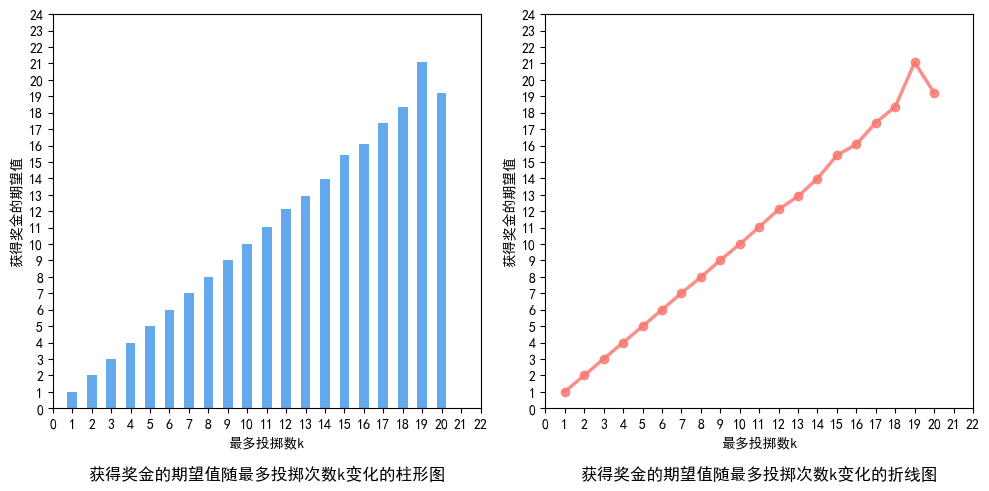

In [1]:
import random
import matplotlib.pyplot as plt #导入相关库
from matplotlib.ticker import FormatStrFormatter
def simulate_expectation(k): #定义函数求解每个k下的奖金期望
    expectation = 0
    for i in range(1000000):  #进行100000次模拟
        n = 1 #投掷数从1开始
        for _ in range(k):
            a=random.randint(0, 1) #进行一次投掷，为1表示正面朝上，为0表示反面朝上
            if a == 1 or n == k: #若正面朝上或已达到投掷次数上限则退出循环
                break
            else:
                n += 1
        if a==1: #若最后一次正面朝上则加入此次获得的奖金值
            expectation += 2 ** n
    return expectation / 1000000  #计算期望值

k_values = list(range(1, 21))  #k的取值范围
expectation_values = [simulate_expectation(k) for k in k_values]  #计算对应k值的期望值

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#创建图形和子图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#设置子图1的属性和绘制柱形图
axes[0].set_xlim(0, 22) #设置x轴刻度范围
axes[0].set_ylim(0, 24) #设置y轴刻度范围
axes[0].locator_params(axis='x', nbins=22) #设置x轴刻度间隔
axes[0].locator_params(axis='y', nbins=24) #设置y轴刻度间隔
formatter = FormatStrFormatter('%d') #格式化刻度显示
axes[0].xaxis.set_major_formatter(formatter) #设置x轴刻度显示格式
axes[0].yaxis.set_major_formatter(formatter) #设置y轴刻度显示格式
axes[0].bar(k_values, expectation_values, color='#63A9EB', width=0.5, linewidth=1.2)
axes[0].set_xlabel('最多投掷数k')
axes[0].set_ylabel('获得奖金的期望值')
axes[0].set_title('获得奖金的期望值随最多投掷次数k变化的柱形图', y=-0.2)

#设置子图2的属性和绘制折线图
axes[1].set_xlim(0, 22)
axes[1].set_ylim(0, 24)
axes[1].locator_params(axis='x', nbins=22)
axes[1].locator_params(axis='y', nbins=24)
formatter = FormatStrFormatter('%d')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].plot(k_values, expectation_values, color='#F8766D',linestyle='-',marker='o', linewidth=2.5, alpha = 0.8)
axes[1].set_xlabel('最多投掷数k')
axes[1].set_ylabel('获得奖金的期望值')
axes[1].set_title('获得奖金的期望值随最多投掷次数k变化的折线图', y=-0.2)

#调整子图之间的间距
plt.tight_layout()

#显示图形
plt.show()

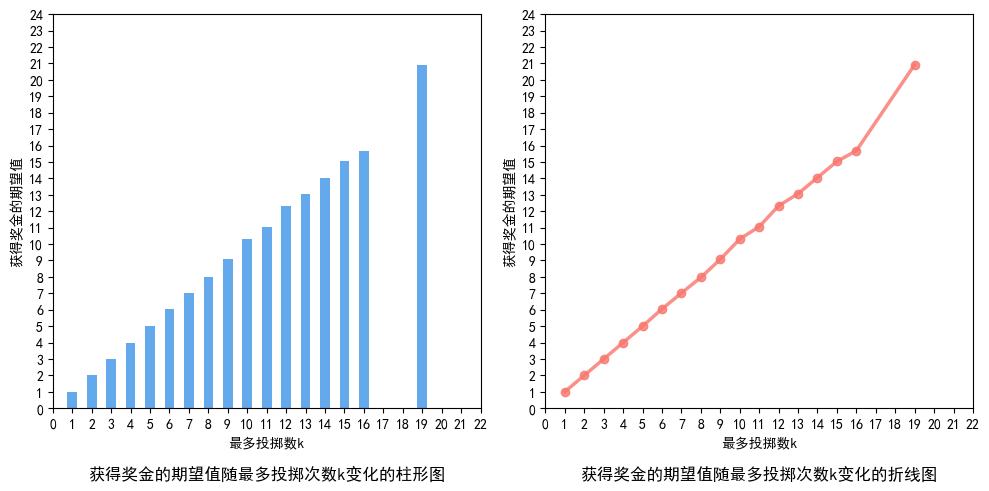

In [2]:
import numpy as np
import matplotlib.pyplot as plt #导入相关库
from matplotlib.ticker import FormatStrFormatter

x=np.random.geometric(0.5,100000) #生成满足几何分布的一组数值
unique_values, counts = np.unique(x, return_counts=True) #统计其中各个试验数的数量
probabilities = counts / 100000  #计算相应的概率
result = np.zeros_like(unique_values,dtype=float)  #定义矩阵表示每次试验成功时的奖金期望值
for i in range(len(unique_values)): #计算对应期望值
    result[i] = probabilities[i] * np.power(2, unique_values[i]) 
cumulative_sum = np.cumsum(result) #计算累计的期望


plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#创建图形和子图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#设置子图1的属性和绘制柱形图
axes[0].set_xlim(0, 22) #设置x轴刻度范围
axes[0].set_ylim(0, 24) #设置y轴刻度范围
axes[0].locator_params(axis='x', nbins=22) #设置x轴刻度间隔
axes[0].locator_params(axis='y', nbins=24) #设置y轴刻度间隔
formatter = FormatStrFormatter('%d') #格式化刻度显示
axes[0].xaxis.set_major_formatter(formatter) #设置x轴刻度显示格式
axes[0].yaxis.set_major_formatter(formatter) #设置y轴刻度显示格式
axes[0].bar(unique_values, cumulative_sum, color='#63A9EB', width=0.5, linewidth=1.2)
axes[0].set_xlabel('最多投掷数k')
axes[0].set_ylabel('获得奖金的期望值')
axes[0].set_title('获得奖金的期望值随最多投掷次数k变化的柱形图', y=-0.2)

#设置子图2的属性和绘制折线图
axes[1].set_xlim(0, 22)
axes[1].set_ylim(0, 24)
axes[1].locator_params(axis='x', nbins=22)
axes[1].locator_params(axis='y', nbins=24)
formatter = FormatStrFormatter('%d')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].plot(unique_values, cumulative_sum, color='#F8766D',linestyle='-',marker='o', linewidth=2.5, alpha = 0.8)
axes[1].set_xlabel('最多投掷数k')
axes[1].set_ylabel('获得奖金的期望值')
axes[1].set_title('获得奖金的期望值随最多投掷次数k变化的折线图', y=-0.2)

#调整子图之间的间距
plt.tight_layout()

#显示图形
plt.show()